In [2]:
import pandas as pd

In [3]:
df_comp = pd.read_csv('constituents-financials_csv.csv')

In [4]:
df_comp.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

# Legendas:

* **Price/Earnings**: índice usado para medir quão baratos ou caros os preços das ações estão, dentro de um período de comparação

* **Dividend Yield**: redimento do dividendo => medir a rentabilidade dos dividendos de uma empresa em relação ao preço de suas ações

* **Earning/Shares**: Lucro por ação é o valor monetário dos ganhos por ação 

* **52 week high/low**: É o máximo e o mínimo que o preço de uma ação foi negociado durante o ano

* **Market Cap**: Capitalização de mercado é uma estimativa do valor de mercado dessa empresa de acordo com as expectativas acerca dec ondições econômicas e monetárias futuras

* **Price/book**: Razão preço/livro é uma razão financeira => comparar o preço de mercado atual de uma empresa com seu valor contábil

* **Sec Filings**: registro na SEC

In [7]:
df_comp[:10]

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.770,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.390,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.600,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.860,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.600,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
5,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.431903,1.28,74.945,38.930,52518668144,2.704000e+09,10.595120,5.16,http://www.sec.gov/cgi-bin/browse-edgar?action...
6,AYI,Acuity Brands Inc,Industrials,145.41,18.22,0.351185,7.43,225.360,142.000,6242377704,5.878000e+08,1.795347,3.55,http://www.sec.gov/cgi-bin/browse-edgar?action...
7,ADBE,Adobe Systems Inc,Information Technology,185.16,52.31,0.000000,3.39,204.450,114.451,94550214268,2.538040e+09,13.092818,11.06,http://www.sec.gov/cgi-bin/browse-edgar?action...
8,AAP,Advance Auto Parts,Consumer Discretionary,109.63,19.54,0.218321,6.19,169.550,78.810,8123611867,8.539410e+08,1.130106,2.51,http://www.sec.gov/cgi-bin/browse-edgar?action...
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.000000,0.03,15.650,9.700,11191663795,3.390000e+08,2.109196,21.47,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [15]:
print('Menor valor de 52 Week Low: {}\
\nMaior valor de 52 Week High: {}'\
      .format(df_comp['52 Week Low'].min(),
             df_comp['52 Week High'].max()))

Menor valor de 52 Week Low: 6.59
Maior valor de 52 Week High: 1589.0


In [11]:
df_comp['52 Week Low'].min()

6.59

In [6]:
df_comp[['Name' , 'Sector']].groupby('Sector').count()

,Name
Sector,
Consumer Discretionary,84
Consumer Staples,34
Energy,32
Financials,68
Health Care,61
Industrials,67
Information Technology,70
Materials,25
Real Estate,33


In [6]:
industria = df_comp.where(df_comp['Sector'] == 'Industrials')
industria = industria.dropna()
industria[:5]

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
6,AYI,Acuity Brands Inc,Industrials,145.41,18.22,0.351185,7.43,225.36,142.000,6.242378e+09,5.878000e+08,1.795347,3.55,http://www.sec.gov/cgi-bin/browse-edgar?action...
17,ALK,Alaska Air Group Inc,Industrials,64.04,9.66,1.992838,8.28,101.43,59.250,7.903174e+09,1.665000e+09,0.980109,2.21,http://www.sec.gov/cgi-bin/browse-edgar?action...
22,ALLE,Allegion,Industrials,77.32,21.07,0.800400,2.37,89.81,66.720,7.599609e+09,5.318000e+08,4.265232,20.48,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [7]:
df_comp[['Sector', 'Dividend Yield']].groupby('Sector').describe()

Dividend Yield                                \
                                    count      mean       std       min   
Sector                                                                    
Consumer Discretionary               84.0  1.572412  1.401486  0.000000   
Consumer Staples                     34.0  2.433391  0.941169  0.000000   
Energy                               32.0  2.014452  1.516072  0.000000   
Financials                           68.0  2.017241  1.005999  0.000000   
Health Care                          61.0  0.917243  1.104882  0.000000   
Industrials                          67.0  1.479392  0.863976  0.000000   
Information Technology               70.0  1.228494  1.217524  0.000000   
Materials                            25.0  1.737976  0.847067  0.396040   
Real Estate                          33.0  3.894758  1.653975  0.000000   
Telecommunication Services            3.0  7.567797  4.428624  4.626544   
Utilities                            28.0  3.759224  1.267525  0.000000   

                                                                     
                                 25%       50%       75%        max  
Sector                                                               
Consumer Discretionary      0.075397  1.476855  2.496131   6.784387  
Consumer Staples            1.970444  2.416417  3.163331   4.328479  
Energy                      0.627482  1.877645  2.901025   5.443620  
Financials                  1.533955  1.930323  2.356969   5.429864  
Health Care                 0.000000  0.587927  1.512042   3.887936  
Industrials                 0.886330  1.472651  2.020007   3.620873  
Information Technology      0.000000  1.087073  2.066031   5.085772  
Materials                   1.017035  1.577149  2.263084   3.264714  
Real Estate                 3.213810  3.714936  4.316159   7.713499  
Telecommunication Services  5.021098  5.415651  9.038424  12.661196  
Utilities                   3.388092  3.695362  4.564602   6.683034

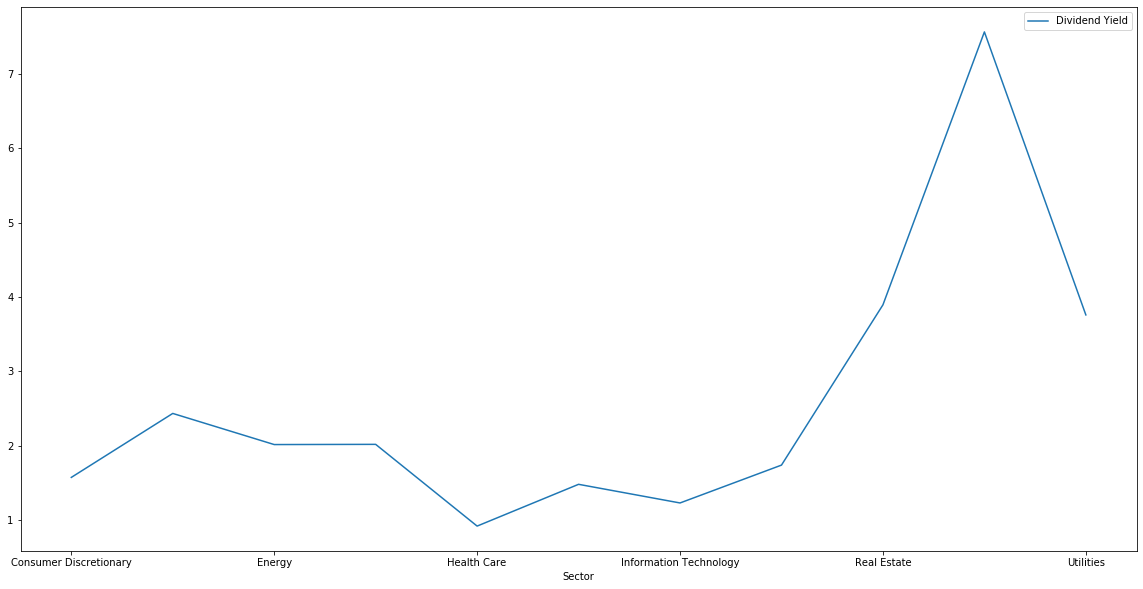

In [8]:
df_comp[['Sector', 'Dividend Yield']].groupby('Sector').mean().plot(figsize = (20,10))

Telecommunication Services    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

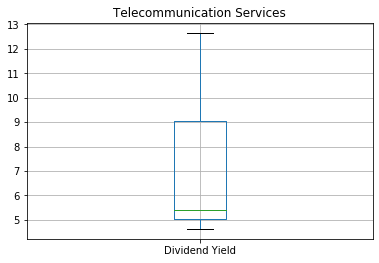

In [56]:
import numpy as np
from matplotlib.pyplot import plot as plt

df_comp[['Sector', 'Dividend Yield']].where(df_comp['Sector'] == 'Telecommunication Services')\
.groupby('Sector').boxplot()

In [10]:
df_comp[['Sector', 'Dividend Yield']].where(df_comp['Sector'] == 'Telecommunication Services')\
.groupby('Sector').describe()

Dividend Yield                                \
                                    count      mean       std       min   
Sector                                                                    
Telecommunication Services            3.0  7.567797  4.428624  4.626544   

                                                                     
                                 25%       50%       75%        max  
Sector                                                               
Telecommunication Services  5.021098  5.415651  9.038424  12.661196

In [25]:
high_dividend = df_comp['Dividend Yield'] >= 7.0
df_comp[high_dividend]


,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
99,CTL,CenturyLink Inc,Telecommunication Services,16.20,8.35,12.661196,1.16,27.61,13.161,18237196861,5.577000e+09,1.479598,1.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
257,IRM,Iron Mountain Incorporated,Real Estate,32.07,15.42,7.082580,0.46,41.53,32.050,9410249279,1.116140e+09,3.289863,4.97,http://www.sec.gov/cgi-bin/browse-edgar?action...
269,KIM,Kimco Realty,Real Estate,14.01,9.28,7.713499,0.80,25.15,14.330,6180487499,7.011900e+08,7.050894,1.20,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [26]:
df_comp['Market Cap'].describe()

count    5.050000e+02
mean     4.923944e+10
std      9.005017e+10
min      2.626102e+09
25%      1.273207e+10
50%      2.140095e+10
75%      4.511968e+10
max      8.095080e+11
Name: Market Cap, dtype: float64

In [63]:
df_comp[['Sector', 'Market Cap']].groupby('Sector').describe()

Market Cap                              \
                                count          mean           std   
Sector                                                              
Consumer Discretionary           84.0  3.825670e+10  8.189154e+10   
Consumer Staples                 34.0  6.138460e+10  6.887076e+10   
Energy                           32.0  4.241605e+10  6.526423e+10   
Financials                       68.0  5.062720e+10  7.358847e+10   
Health Care                      61.0  5.318621e+10  6.214176e+10   
Industrials                      67.0  3.599315e+10  3.879355e+10   
Information Technology           70.0  9.610174e+10  1.789209e+11   
Materials                        25.0  2.769201e+10  3.141316e+10   
Real Estate                      33.0  1.894896e+10  1.271020e+10   
Telecommunication Services        3.0  1.510142e+11  1.153646e+11   
Utilities                        28.0  2.184402e+10  1.540150e+10   

                                                                      \
                                     min           25%           50%   
Sector                                                                 
Consumer Discretionary      3.034276e+09  9.461778e+09  1.434277e+10   
Consumer Staples            5.498034e+09  1.673997e+10  3.077178e+10   
Energy                      2.626102e+09  1.311802e+10  2.200518e+10   
Financials                  3.692691e+09  1.351970e+10  2.662220e+10   
Health Care                 3.209792e+09  1.642077e+10  3.229520e+10   
Industrials                 5.330131e+09  1.292375e+10  1.936306e+10   
Information Technology      5.134501e+09  1.447537e+10  2.693714e+10   
Materials                   8.001938e+09  1.127396e+10  1.696416e+10   
Real Estate                 6.156884e+09  9.858367e+09  1.439472e+10   
Telecommunication Services  1.823720e+10  1.131647e+11  2.080923e+11   
Utilities                   5.229449e+09  1.174598e+10  1.845897e+10   

                                                        
                                     75%           max  
Sector                                                  
Consumer Discretionary      2.801450e+10  6.858734e+11  
Consumer Staples            7.420799e+10  3.046809e+11  
Energy                      4.032337e+10  3.261487e+11  
Financials                  4.789779e+10  3.866136e+11  
Health Care                 6.122198e+10  3.530625e+11  
Industrials                 4.229192e+10  2.056174e+11  
Information Technology      9.227098e+10  8.095080e+11  
Materials                   3.463839e+10  1.652033e+11  
Real Estate                 2.140095e+10  5.921389e+10  
Telecommunication Services  2.174028e+11  2.267133e+11  
Utilities                   2.464450e+10  6.966118e+10

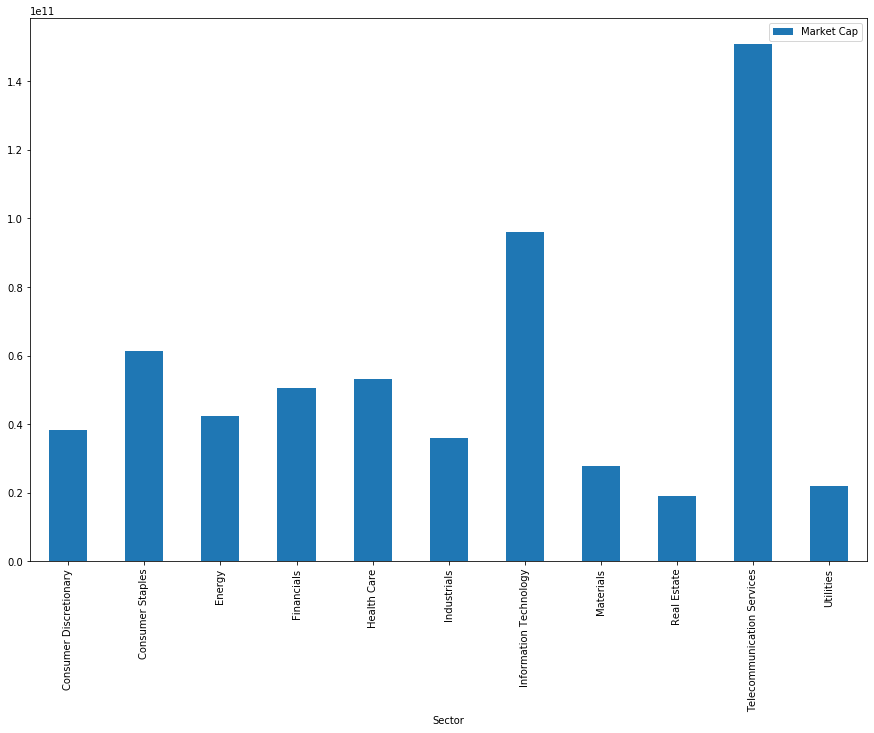

In [58]:

df_comp[['Sector', 'Market Cap']].groupby('Sector').mean().plot(kind = 'bar', figsize = (15,10))

Information Technology    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

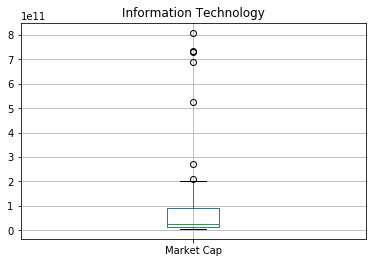

In [59]:
df_comp[['Sector', 'Market Cap']].where(df_comp['Sector'] == 'Information Technology')\
.groupby('Sector').boxplot()

Telecommunication Services    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

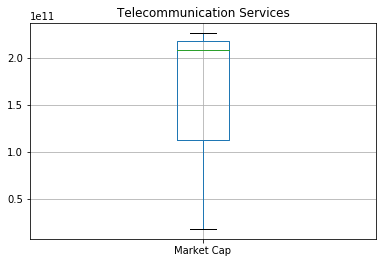

In [62]:
df_comp[['Sector', 'Market Cap']].where(df_comp['Sector'] == 'Telecommunication Services')\
.groupby('Sector').boxplot()

In [15]:
high_market_cap = df_comp['Market Cap'] >= 9.227098e+10
high_market_cap_tec = df_comp.where(df_comp['Sector'] == 'Information Technology')[high_market_cap].dropna()

In [16]:
high_market_cap_tec.sort_values(by = 'Market Cap')

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
81,AVGO,Broadcom,Information Technology,229.57,15.94,2.948858,4.01,285.68,202.6100,9.279197e+10,7.016000e+09,6.961893,4.40,http://www.sec.gov/cgi-bin/browse-edgar?action...
7,ADBE,Adobe Systems Inc,Information Technology,185.16,52.31,0.000000,3.39,204.45,114.4510,9.455021e+10,2.538040e+09,13.092818,11.06,http://www.sec.gov/cgi-bin/browse-edgar?action...
383,QCOM,QUALCOMM Inc.,Information Technology,62.42,16.51,3.505535,1.65,69.28,48.9200,9.628283e+10,4.191000e+09,4.263658,3.82,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.8200,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
434,TXN,Texas Instruments,Information Technology,97.66,24.05,2.431849,3.60,120.75,74.5200,1.002625e+11,7.013000e+09,6.957223,9.32,http://www.sec.gov/cgi-bin/browse-edgar?action...
326,NFLX,Netflix Inc.,Information Technology,250.10,200.08,0.000000,1.25,286.81,138.2600,1.148054e+11,8.090280e+08,9.861594,30.80,http://www.sec.gov/cgi-bin/browse-edgar?action...
344,NVDA,Nvidia Corporation,Information Technology,217.52,82.08,0.262238,2.57,249.27,95.1700,1.386528e+11,3.098000e+09,20.094294,20.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
249,IBM,International Business Machines,Information Technology,147.59,10.67,3.899903,6.11,182.79,139.1300,1.424330e+11,1.655700e+10,1.817167,7.70,http://www.sec.gov/cgi-bin/browse-edgar?action...
298,MA,Mastercard Inc.,Information Technology,160.62,34.99,0.592663,3.65,177.11,105.8000,1.871020e+11,7.113000e+09,15.020556,26.93,http://www.sec.gov/cgi-bin/browse-edgar?action...
113,CSCO,Cisco Systems,Information Technology,38.77,17.87,2.875558,1.91,42.98,30.3600,1.994257e+11,1.544700e+10,5.484418,3.07,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [82]:
market_cap_comm = df_comp.where(df_comp['Sector'] == 'Telecommunication Services')\
.dropna().sort_values(by = 'Market Cap', ascending = False)
market_cap_comm

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
58,T,AT&T Inc,Telecommunication Services,35.57,12.14,5.415651,4.76,42.70,32.550,2.267133e+11,4.965300e+10,1.408315,1.80,http://www.sec.gov/cgi-bin/browse-edgar?action...
474,VZ,Verizon Communications,Telecommunication Services,49.04,13.08,4.626544,7.36,54.77,42.800,2.080923e+11,4.574500e+10,1.645254,7.96,http://www.sec.gov/cgi-bin/browse-edgar?action...
99,CTL,CenturyLink Inc,Telecommunication Services,16.20,8.35,12.661196,1.16,27.61,13.161,1.823720e+10,5.577000e+09,1.479598,1.39,http://www.sec.gov/cgi-bin/browse-edgar?action...


# DF: information technology

In [85]:
filtro = df_comp['Sector'] == 'Information Technology'

df_tech = df_comp[filtro]
df_tech

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.600,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
5,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.431903,1.28,74.945,38.930,52518668144,2.704000e+09,10.595120,5.16,http://www.sec.gov/cgi-bin/browse-edgar?action...
7,ADBE,Adobe Systems Inc,Information Technology,185.16,52.31,0.000000,3.39,204.450,114.451,94550214268,2.538040e+09,13.092818,11.06,http://www.sec.gov/cgi-bin/browse-edgar?action...
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.000000,0.03,15.650,9.700,11191663795,3.390000e+08,2.109196,21.47,http://www.sec.gov/cgi-bin/browse-edgar?action...
16,AKAM,Akamai Technologies Inc,Information Technology,62.49,32.55,0.000000,1.79,69.560,44.650,10906904066,7.895170e+08,5.854652,3.25,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,V,Visa Inc.,Information Technology,113.86,32.72,0.702048,2.80,126.880,84.880,270038723213,1.308600e+10,14.433654,9.40,http://www.sec.gov/cgi-bin/browse-edgar?action...
487,WDC,Western Digital,Information Technology,80.09,10.19,2.389201,1.29,95.770,71.380,24760297793,5.169000e+09,1.245503,2.00,http://www.sec.gov/cgi-bin/browse-edgar?action...
488,WU,Western Union Co,Information Technology,18.81,10.17,3.591585,0.51,22.210,18.390,8951609207,6.946000e+08,2.226770,12.65,http://www.sec.gov/cgi-bin/browse-edgar?action...
497,XRX,Xerox Corp.,Information Technology,29.80,8.87,3.207184,0.59,37.420,26.640,7938833340,1.191000e+09,0.787766,1.49,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [88]:
df_52_ratio = df_tech['52 Week High'] / df_tech['52 Week Low']
df_52_ratio

4      0.706150
5      0.519448
7      0.559799
9      0.619808
16     0.641892
         ...   
477    0.668979
487    0.745327
488    0.828005
497    0.711919
498    0.711753
Length: 70, dtype: float64

In [89]:
df_tech['52 Ratio'] = df_tech['52 Week High'] / df_tech['52 Week Low']

/home/matheus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
df_tech.sort_values(by = '52 Ratio')

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,52 Ratio
344,NVDA,Nvidia Corporation,Information Technology,217.52,82.08,0.262238,2.57,249.27,95.1700,138652800000,3.098000e+09,20.094294,20.39,http://www.sec.gov/cgi-bin/browse-edgar?action...,0.381795
310,MU,Micron Technology,Information Technology,40.00,9.01,0.000000,4.36,49.89,22.6400,48576791974,1.254100e+10,2.191281,2.02,http://www.sec.gov/cgi-bin/browse-edgar?action...,0.453798
355,PYPL,PayPal,Information Technology,72.32,49.53,0.000000,1.47,86.32,39.9200,90708000000,2.932000e+09,6.935696,5.81,http://www.sec.gov/cgi-bin/browse-edgar?action...,0.462465
326,NFLX,Netflix Inc.,Information Technology,250.10,200.08,0.000000,1.25,286.81,138.2600,114805404842,8.090280e+08,9.861594,30.80,http://www.sec.gov/cgi-bin/browse-edgar?action...,0.482061
230,HPE,Hewlett Packard Enterprise,Information Technology,15.04,11.57,1.928021,0.21,24.88,12.8150,24800859640,3.683000e+09,1.460977,1.06,http://www.sec.gov/cgi-bin/browse-edgar?action...,0.515072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,JNPR,Juniper Networks,Information Technology,24.66,14.09,1.575423,0.78,30.96,23.8700,9267350000,1.115500e+09,1.854333,1.78,http://www.sec.gov/cgi-bin/browse-edgar?action...,0.770995
116,CTXS,Citrix Systems,Information Technology,84.53,20.37,0.000000,-0.24,95.00,73.3346,13199167493,8.102680e+08,4.753871,6.73,http://www.sec.gov/cgi-bin/browse-edgar?action...,0.771943
133,CSRA,CSRA Inc.,Information Technology,30.85,15.12,1.275917,1.83,33.79,27.3800,5134501276,5.430000e+08,1.332484,11.37,http://www.sec.gov/cgi-bin/browse-edgar?action...,0.810299
488,WU,Western Union Co,Information Technology,18.81,10.17,3.591585,0.51,22.21,18.3900,8951609207,6.946000e+08,2.226770,12.65,http://www.sec.gov/cgi-bin/browse-edgar?action...,0.828005


In [94]:
df_tech[['Earnings/Share', '52 Ratio']].corr()

,Earnings/Share,52 Ratio
Earnings/Share,1.000000,0.031227
52 Ratio,0.031227,1.000000


In [95]:
df_tech.corr()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,52 Ratio
Price,1.000000,0.043824,-0.252551,0.860113,0.999287,0.993236,0.639464,0.400270,0.197123,0.007597,-0.044146
Price/Earnings,0.043824,1.000000,-0.273645,-0.089505,0.035835,0.013519,-0.003979,-0.090102,0.178640,-0.126951,-0.140018
Dividend Yield,-0.252551,-0.273645,1.000000,-0.103105,-0.240702,-0.210781,-0.069248,0.066950,-0.443811,-0.159410,0.321916
Earnings/Share,0.860113,-0.089505,-0.103105,1.000000,0.862287,0.873159,0.627706,0.500119,-0.002921,-0.160627,0.031227
52 Week Low,0.999287,0.035835,-0.240702,0.862287,1.000000,0.994164,0.638144,0.401623,0.186271,0.010620,-0.045305
52 Week High,0.993236,0.013519,-0.210781,0.873159,0.994164,1.000000,0.640647,0.415158,0.132049,-0.004906,0.042309
Market Cap,0.639464,-0.003979,-0.069248,0.627706,0.638144,0.640647,1.000000,0.911966,0.178844,-0.049181,0.000930
EBITDA,0.400270,-0.090102,0.066950,0.500119,0.401623,0.415158,0.911966,1.000000,-0.001587,-0.089137,0.058113
Price/Sales,0.197123,0.178640,-0.443811,-0.002921,0.186271,0.132049,0.178844,-0.001587,1.000000,0.398263,-0.372930
Price/Book,0.007597,-0.126951,-0.159410,-0.160627,0.010620,-0.004906,-0.049181,-0.089137,0.398263,1.000000,-0.119869


# Analisando as Colunas 52 Week Low/High

In [18]:
df_comp[['52 Week Low', '52 Week High']].describe()

,52 Week Low,52 Week High
count,505.000000,505.000000
mean,122.623832,83.536616
std,155.362140,105.725473
min,6.590000,2.800000
25%,56.250000,38.430000
50%,86.680000,62.850000
75%,140.130000,96.660000
max,2067.990000,1589.000000


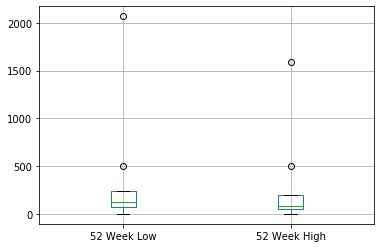

In [19]:
df_comp[['52 Week Low', '52 Week High']].describe().boxplot()

In [27]:
menores_valores = df_comp['52 Week Low'] <= 56.250000


df_52_lowest = df_comp[menores_valores] 
df_52_lowest

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.000000,0.03,15.650,9.7000,11191663795,3.390000e+08,2.109196,21.47,http://www.sec.gov/cgi-bin/browse-edgar?action...
10,AES,AES Corp,Utilities,10.06,9.96,4.961832,-1.72,12.050,10.0000,6920851212,3.001000e+09,0.659514,2.20,http://www.sec.gov/cgi-bin/browse-edgar?action...
25,LNT,Alliant Energy Corp,Utilities,37.14,19.86,3.573333,1.65,45.550,36.8400,8670163500,1.168400e+09,3.433148,2.13,http://www.sec.gov/cgi-bin/browse-edgar?action...
50,AIV,Apartment Investment & Management,Real Estate,38.21,15.60,3.876562,1.95,46.855,38.8500,6156884142,8.748710e+08,6.187621,4.69,http://www.sec.gov/cgi-bin/browse-edgar?action...
54,ADM,Archer-Daniels-Midland Co,Consumer Staples,41.35,17.45,3.176108,2.17,47.440,38.5900,23594770663,2.927000e+09,0.524789,1.29,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,WMB,Williams Cos.,Energy,28.56,48.41,4.000000,-0.57,33.670,26.8188,24802396470,3.955000e+09,4.298285,3.01,http://www.sec.gov/cgi-bin/browse-edgar?action...
496,XEL,Xcel Energy Inc,Utilities,42.44,18.14,3.391427,2.21,52.220,41.1600,21559611927,3.885828e+09,2.520456,1.94,http://www.sec.gov/cgi-bin/browse-edgar?action...
497,XRX,Xerox Corp.,Information Technology,29.80,8.87,3.207184,0.59,37.420,26.6400,7938833340,1.191000e+09,0.787766,1.49,http://www.sec.gov/cgi-bin/browse-edgar?action...
499,XL,XL Capital,Financials,41.26,-19.93,2.095238,-2.24,47.270,33.7700,10753423590,0.000000e+00,0.843942,0.97,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [30]:
df_52_lowest[['Sector', '52 Week High']].groupby('Sector').mean()

,52 Week High
Sector,
Consumer Discretionary,22.801074
Consumer Staples,32.131250
Energy,21.558208
Financials,26.731368
Health Care,30.436000
Industrials,30.255625
Information Technology,25.734412
Materials,27.260000
Real Estate,26.354040


In [40]:
print(f'Média das semanas maiores: {df_52_lowest["52 Week High"].mean()}\nMédia das semanas menores: \
{df_52_lowest["52 Week Low"].mean()}')

Média das semanas maiores: 26.396534645669295
Média das semanas menores: 38.00877795275593


In [42]:
# máscara para min das semanas maiores

maiores_valores = df_comp['52 Week High'] <= 56.250000

df_52_highest = df_comp[maiores_valores]

In [43]:
df_52_highest

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.390,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.600,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
5,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.431903,1.28,74.945,38.930,52518668144,2.704000e+09,10.595120,5.16,http://www.sec.gov/cgi-bin/browse-edgar?action...
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.000000,0.03,15.650,9.700,11191663795,3.390000e+08,2.109196,21.47,http://www.sec.gov/cgi-bin/browse-edgar?action...
10,AES,AES Corp,Utilities,10.06,9.96,4.961832,-1.72,12.050,10.000,6920851212,3.001000e+09,0.659514,2.20,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,XLNX,Xilinx Inc,Information Technology,62.82,27.19,2.090488,2.32,77.260,54.990,17064975551,8.454680e+08,7.101206,7.22,http://www.sec.gov/cgi-bin/browse-edgar?action...
499,XL,XL Capital,Financials,41.26,-19.93,2.095238,-2.24,47.270,33.770,10753423590,0.000000e+00,0.843942,0.97,http://www.sec.gov/cgi-bin/browse-edgar?action...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.810,46.860,12915021000,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.610,38.430,10670678640,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [44]:
df_52_highest[['Sector', '52 Week High']].groupby('Sector').mean()

,52 Week High
Sector,
Consumer Discretionary,33.017062
Consumer Staples,37.345000
Energy,29.956881
Financials,34.757161
Health Care,43.986483
Industrials,41.020848
Information Technology,33.122321
Materials,34.895556
Real Estate,36.025025


In [45]:
df_52_highest['52 Week High'].mean()

35.23372314096919

In [46]:
print(f'Média das semanas maiores: {df_52_highest["52 Week High"].mean()}\nMédia das semanas menores: \
{df_52_highest["52 Week Low"].mean()}')

Média das semanas maiores: 35.23372314096919
Média das semanas menores: 51.956729074889864


# Analisando a Coluna Price

In [47]:
df_comp[['Sector', 'Price']].groupby('Sector').describe()

Price                                          \
                           count        mean         std    min      25%   
Sector                                                                     
Consumer Discretionary      84.0  124.034524  249.466971  10.43  39.7525   
Consumer Staples            34.0   79.764118   41.731894  19.96  49.0325   
Energy                      32.0   57.887500   38.683557   2.82  28.2950   
Financials                  68.0   89.056029   73.949182  13.38  48.3275   
Health Care                 61.0  132.515738   98.048981  25.20  71.5100   
Industrials                 67.0  116.887612   79.320826  14.45  60.3000   
Information Technology      70.0  119.242857  162.608472  11.22  46.9900   
Materials                   25.0  102.386800   75.450302  17.16  56.0500   
Real Estate                 33.0   88.712727   77.537399  14.01  38.2100   
Telecommunication Services   3.0   33.603333   16.508096  16.20  25.8850   
Utilities                   28.0   55.194643   28.992698  10.06  35.8850   

                                                        
                                50%       75%      max  
Sector                                                  
Consumer Discretionary       65.140  101.4075  1806.06  
Consumer Staples             69.750  101.1175   208.73  
Energy                       50.325   78.7450   169.16  
Financials                   71.105  104.5050   509.38  
Health Care                  96.420  173.1200   601.00  
Industrials                  87.600  154.9050   334.30  
Information Technology       84.770  130.9500  1007.71  
Materials                   105.180  121.4700   387.65  
Real Estate                  58.360  112.0900   409.98  
Telecommunication Services   35.570   42.3050    49.04  
Utilities                    49.660   73.5625   145.29

In [50]:
df_comp[['Sector', 'Price']].groupby('Sector').mean()

,Price
Sector,
Consumer Discretionary,124.034524
Consumer Staples,79.764118
Energy,57.887500
Financials,89.056029
Health Care,132.515738
Industrials,116.887612
Information Technology,119.242857
Materials,102.386800
Real Estate,88.712727


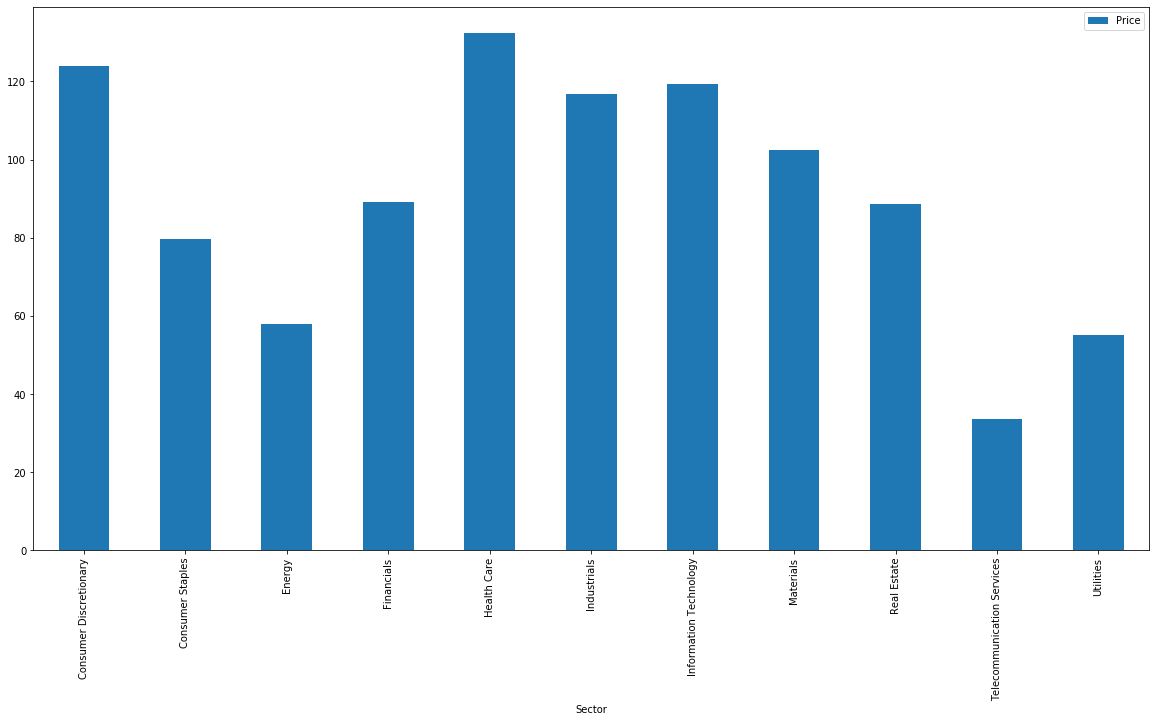

In [55]:
from matplotlib.pyplot import plot as plt

df_comp[['Sector', 'Price']].groupby('Sector').mean()\
.plot(kind = 'bar', figsize = (20,10))

In [56]:
df_comp.corr()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
Price,1.000000,0.194761,-0.244630,0.591061,0.995076,0.982787,0.406474,0.180321,0.181625,0.023637
Price/Earnings,0.194761,1.000000,-0.181330,0.004570,0.185356,0.144700,0.131381,0.002950,0.188558,0.000366
Dividend Yield,-0.244630,-0.181330,1.000000,-0.077235,-0.244426,-0.207953,-0.021794,0.126133,-0.077724,0.089369
Earnings/Share,0.591061,0.004570,-0.077235,1.000000,0.588595,0.604894,0.194063,0.180583,-0.036178,0.032254
52 Week Low,0.995076,0.185356,-0.244426,0.588595,1.000000,0.984853,0.398504,0.176277,0.188823,0.023322
52 Week High,0.982787,0.144700,-0.207953,0.604894,0.984853,1.000000,0.375588,0.179666,0.173721,0.017794
Market Cap,0.406474,0.131381,-0.021794,0.194063,0.398504,0.375588,1.000000,0.771344,0.095249,0.034411
EBITDA,0.180321,0.002950,0.126133,0.180583,0.176277,0.179666,0.771344,1.000000,-0.037175,0.035547
Price/Sales,0.181625,0.188558,-0.077724,-0.036178,0.188823,0.173721,0.095249,-0.037175,1.000000,0.012337
Price/Book,0.023637,0.000366,0.089369,0.032254,0.023322,0.017794,0.034411,0.035547,0.012337,1.000000
